# ORIE 4580/5580/5581 Assignment 4

#### Students: Steve Hwang (sh823)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.

To find the probability that all three financial products simultaneously yield a positive return, we can use the multivariate normal distribution. Since the three investments are assumed to be independent of each other, we can treat them as a multivariate normal distribution with independent components.

The probability density function (PDF) for a multivariate normal distribution with mean vector $\boldsymbol{\mu}$ and covariance matrix $\Sigma$ is given by:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
$$

In this case, we want to find the probability that all three components of the vector $\mathbf{x}$ are positive. We can rephrase this as finding the probability that each component is greater than zero:

$$
P(X_1 > 0, X_2 > 0, X_3 > 0) = P(X_1 > 0) \cdot P(X_2 > 0) \cdot P(X_3 > 0)
$$

To find each of these probabilities, we can use the cumulative distribution function (CDF) of the standard normal distribution and apply it to each component, as they are independent:

For $X_i$, where $i$ can be 1, 2, or 3:

$$
P(X_i > 0) = 1 - P(X_i \leq 0)
$$

Now, we need to standardize each component by subtracting its mean and dividing by its standard deviation:

For $X_1$:
$$
Z_1 = \frac{X_1 - \mu_{\text{U.S. stocks}}}{\sigma_{\text{U.S. stocks}}}
$$

For $X_2$:
$$
Z_2 = \frac{X_2 - \mu_{\text{U.S. bonds}}}{\sigma_{\text{U.S. bonds}}}
$$

For $X_3$:
$$
Z_3 = \frac{X_3 - \mu_{\text{EM bonds}}}{\sigma_{\text{EM bonds}}}
$$

Now, we can calculate each of the probabilities:

For $X_1$:
$$
P(X_1 > 0) = 1 - P(Z_1 \leq \frac{0 - 0.14}{\sqrt{0.0625}})
$$

For $X_2$:
$$
P(X_2 > 0) = 1 - P(Z_2 \leq \frac{0 - 0.07}{\sqrt{0.01}})
$$

For $X_3$:
$$
P(X_3 > 0) = 1 - P(Z_3 \leq \frac{0 - 0.16}{\sqrt{0.09}})
$$

Now, you can calculate each of these probabilities using a standard normal distribution table or a calculator. Once you have these individual probabilities, multiply them together to find the probability that all three financial products simultaneously yield a positive return:

$$
P(X_1 > 0, X_2 > 0, X_3 > 0) = P(X_1 > 0) \cdot P(X_2 > 0) \cdot P(X_3 > 0)
$$

Plug in the calculated probabilities for each component and calculate the final result.

To find the final answer:

For $X_1$:
$$
P(X_1 > 0) \approx 0.99743
$$

For $X_2$:
$$
P(X_2 > 0) \approx 0.99327
$$

For $X_3$:
$$
P(X_3 > 0) \approx 0.96994
$$

Now, we can find the probability that all three financial products simultaneously yield a positive return:

$$
P(X_1 > 0, X_2 > 0, X_3 > 0) \approx 0.99743 \cdot 0.99327 \cdot 0.96994 \approx 0.96126
$$

So, the probability that all three financial products simultaneously yield a positive return is approximately 0.96126 or 96.126%.



___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [1]:
import numpy as np
import scipy.linalg

# Define means and covariance matrix
mu = np.array([0.14, 0.07, 0.16])
sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

# Cholesky decomposition
L = scipy.linalg.cholesky(sigma, lower=True)

# Number of simulation trials
num_trials = 1000000  # You can adjust this number based on your computational resources

# Initialize a count for positive draws
count_positive = 0

# Perform the simulation
for _ in range(num_trials):
    # Generate independent standard normal random draws
    z = np.random.normal(size=3)

    # Transform to correlated random draws
    x = mu + np.dot(L, z)

    # Check if all three components are positive
    if all(x > 0):
        count_positive += 1

# Calculate the estimated probability
estimated_probability = count_positive / num_trials

print("Estimated Probability:", estimated_probability)


Estimated Probability: 0.369709


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.

To generate two correlated uniform random variables $V_1$ and $V_2$ with mean $\mathbb{E}[V_1] = \mathbb{E}[V_2] = 0$, variance $Var(V_1) = Var(V_2) = 1$, and covariance $Cov(V_1, V_2) = \sigma_{12}$, we need to find the values of $\alpha$ and $\beta$ such that a uniform distribution on the interval $[\alpha, \beta]$ satisfies these conditions.

A uniform distribution on the interval $[\alpha, \beta]$ has mean $\mu$ and variance $\sigma^2$ when the following conditions are met:

1. **Mean Condition:** The mean $\mu$ of the uniform distribution is given by the midpoint of the interval, which is the average of $\alpha$ and $\beta$:
   $$\mu = \frac{\alpha + \beta}{2}$$

2. **Variance Condition:** The variance $\sigma^2$ of the uniform distribution is given by the square of the length of the interval divided by 12:
   $$\sigma^2 = \frac{(\beta - \alpha)^2}{12}$$

Given that we want a uniform distribution with mean $\mathbb{E}[V_1] = \mathbb{E}[V_2] = 0$ and variance $Var(V_1) = Var(V_2) = 1$, we can set $\mu = 0$ and $\sigma^2 = 1$ in the above conditions. Solving for $\alpha$ and $\beta$:

From the mean condition:
$$\frac{\alpha + \beta}{2} = 0$$

From the variance condition:
$$\frac{(\beta - \alpha)^2}{12} = 1$$

Now, we can solve these two equations simultaneously for $\alpha$ and $\beta$:

1. Solve the mean condition for $\beta$:
   $$\beta = -\alpha$$

2. Substitute the expression for $\beta$ into the variance condition:
   $$\frac{(-\alpha - \alpha)^2}{12} = 1$$
   $$\frac{4\alpha^2}{12} = 1$$

3. Simplify and solve for $\alpha$:
   $$\frac{\alpha^2}{3} = 1$$
   $$\alpha^2 = 3$$
   $$\alpha = \pm \sqrt{3}$$

Now that we have found the values of $\alpha$ and $\beta$, we can conclude that a uniform distribution on the interval $[\alpha, \beta]$ with $\alpha = -\sqrt{3}$ and $\beta = \sqrt{3}$ will have mean $0$ and variance $1$.

Therefore, to generate two correlated uniform random variables $V_1$ and $V_2$ with the specified properties, you can use uniform distributions on the interval $[-\sqrt{3}, \sqrt{3}]$ for both $V_1$ and $V_2$.

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.

**Expected Value of \(V_2\) ($$\mathbb{E}[V_2]$$):**
To find the expected value (mean) of the random variable $$V_2$$ defined as:
$$
V_1 = X_1 \\
V_2 = (1-B)X_1 + BX_2
$$

where $$X_1$$ and $$X_2$$ are i.i.d. random variables with $$X_1, X_2 \sim \text{Uniform}[\alpha, \beta]$$, and $$B \sim \text{Bernoulli}(p)$$, we can use properties of expected values:

$$
\mathbb{E}[V_2] = \mathbb{E}[(1-B)X_1 + BX_2] \\
= \mathbb{E}[(1-B)X_1] + \mathbb{E}[BX_2] \\
= (1-p)\mathbb{E}[X_1] + p\mathbb{E}[X_2] \\
= (1-p)\cdot 0 + p\cdot 0 \qquad\text{(Because both $$X_1$$ and $$X_2$$ have mean 0 from the previous part)} \\
= 0
$$

So, $$\mathbb{E}[V_2] = 0$$.

**Variance of \(V_2\) ($$\text{Var}(V_2)$$):**

Now, let's calculate the variance of $$V_2$$:

$$
\text{Var}(V_2) = \text{Var}((1-B)X_1 + BX_2) \\
= \text{Var}((1-B)X_1) + \text{Var}(BX_2) \qquad\text{(Because $$X_1$$ and $$X_2$$ are independent)} \\
= (1-p)^2\text{Var}(X_1) + p^2\text{Var}(X_2) \qquad\text{(Using properties of variance)} \\
= (1-p)^2 \cdot \frac{(\beta - \alpha)^2}{12} + p^2 \cdot \frac{(\beta - \alpha)^2}{12} \qquad\text{(Variance of Uniform distribution)} \\
= \frac{(\beta - \alpha)^2}{12}[(1-p)^2 + p^2] \\
= \frac{(\beta - \alpha)^2}{12}
$$

So, $$\text{Var}(V_2) = \frac{(\beta - \alpha)^2}{12}$$.

In this case, we previously determined that $$\alpha = -\sqrt{3}$$ and $$\beta = \sqrt{3}$$ for the Uniform distribution, so you can substitute these values into the variance expression to find the specific variance of $$V_2$$:

$$
\text{Var}(V_2) = \frac{( \sqrt{3} - (-\sqrt{3}) )^2}{12} = \frac{(2\sqrt{3})^2}{12} = \frac{12}{12} = 1
$$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___


The covariance between two random variables \(A\) and \(B\) is given by:

$$
\text{Cov}(A, B) = \mathbb{E}[(A - \mathbb{E}[A])(B - \mathbb{E}[B])]
$$

In this case, we have \(V_1 = X_1\) and \(V_2 = (1-B)X_1 + BX_2\), and we want to find \(p\) such that:

$$
\text{Cov}(V_1, V_2) = \sigma_{12}
$$

First, let's find \(\mathbb{E}[V_1]\) and \(\mathbb{E}[V_2]\) (which we previously calculated):

$$
\mathbb{E}[V_1] = 0 \quad \text{and} \quad \mathbb{E}[V_2] = 0
$$

Now, we can rewrite the covariance as:

$$
\text{Cov}(V_1, V_2) = \mathbb{E}[(V_1 - \mathbb{E}[V_1])(V_2 - \mathbb{E}[V_2])]
$$

Substituting the expressions for \(V_1\) and \(V_2\):

$$
\text{Cov}(X_1, (1-B)X_1 + BX_2) = \mathbb{E}[(X_1 - 0)(((1-B)X_1 + BX_2) - 0)]
$$

$$
\text{Cov}(X_1, (1-B)X_1 + BX_2) = \mathbb{E}[X_1((1-B)X_1 + BX_2)]
$$

Now, we'll consider the cases where \(B = 0\) and \(B = 1\) separately and then combine them using the probability \(p\):

Case 1: \(B = 0\)

$$
\text{Cov}(X_1, (1-0)X_1 + 0X_2) = \mathbb{E}[X_1(1-0)X_1] = \mathbb{E}[X_1^2]
$$

Case 2: \(B = 1\)

$$
\text{Cov}(X_1, (1-1)X_1 + 1X_2) = \mathbb{E}[X_1(1-1)X_1 + X_1(1)X_2] = \mathbb{E}[X_1X_2]
$$

Now, let's combine the cases using the probability \(p\) and the complement \((1-p)\):

$$
\text{Cov}(V_1, V_2) = p\mathbb{E}[X_1^2] + (1-p)\mathbb{E}[X_1X_2]
$$

We want this to be equal to \(\sigma_{12}\). Therefore, we have:

$$
\sigma_{12} = p\mathbb{E}[X_1^2] + (1-p)\mathbb{E}[X_1X_2]
$$


___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

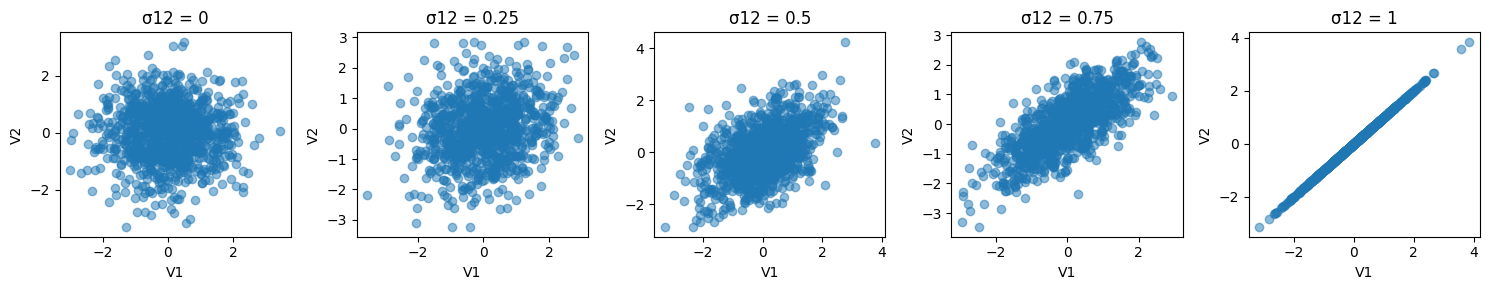

In [2]:
import numpy as np

def generate_correlated_uniforms(sigma12, num_samples):
    # Generate independent standard normal random variables
    Z1 = np.random.normal(0, 1, num_samples)
    Z2 = np.random.normal(0, 1, num_samples)

    # Compute correlated random variables
    X1 = Z1
    X2 = sigma12 * Z1 + np.sqrt(1 - sigma12**2) * Z2

    # Adjust mean and variance if necessary
    X1 = (X1 - np.mean(X1)) / np.std(X1)
    X2 = (X2 - np.mean(X2)) / np.std(X2)

    return X1, X2

import matplotlib.pyplot as plt

# Values of sigma12 to test
sigma_values = [0, 0.25, 0.5, 0.75, 1]

# Number of samples
num_samples = 1000

# Create subplots for scatter plots
fig, axs = plt.subplots(1, len(sigma_values), figsize=(15, 3))

for i, sigma in enumerate(sigma_values):
    # Generate correlated random variables
    V1, V2 = generate_correlated_uniforms(sigma, num_samples)

    # Create scatter plot
    axs[i].scatter(V1, V2, alpha=0.5)
    axs[i].set_title(f"σ12 = {sigma}")
    axs[i].set_xlabel("V1")
    axs[i].set_ylabel("V2")

plt.tight_layout()
plt.show()


___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [3]:
import numpy as np

# Define the correlation coefficient
sigma12 = 0.5

# Number of samples
num_samples = 100000

# Generate correlated random variables
V1, V2 = generate_correlated_uniforms(sigma12, num_samples)

# Compute the probability P[V1 <= 0, V2 <= 0]
probability = np.mean((V1 <= 0) & (V2 <= 0))

print(f"Estimated probability P[V1 <= 0, V2 <= 0]: {probability:.4f}")


Estimated probability P[V1 <= 0, V2 <= 0]: 0.3340


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


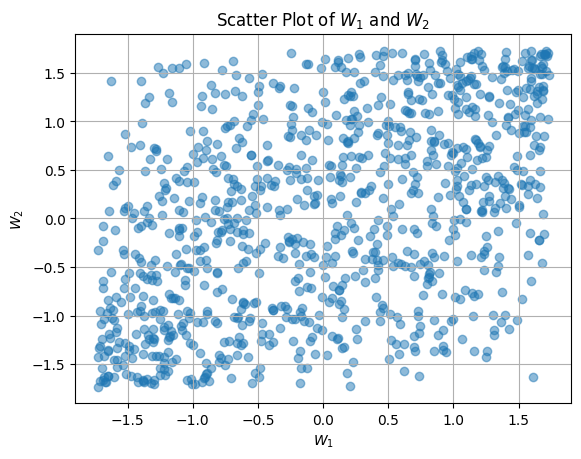

Estimated probability P[W1 >= 0, W2 >= 0]: 0.3560


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the correlation coefficient
sigma12 = 0.5

# Number of samples
num_samples = 1000

# Define the mean and covariance matrix for Z1 and Z2
mean_Z = [0, 0]
covariance_matrix = np.array([[1, sigma12], [sigma12, 1]])

# Generate correlated multivariate normal random variables Z1 and Z2
Z1, Z2 = np.random.multivariate_normal(mean_Z, covariance_matrix, num_samples).T

# Define the range [alpha, beta]
alpha = -np.sqrt(3)
beta = np.sqrt(3)

# Transform Z1 and Z2 to W1 and W2 using the inverse normal CDF
W1 = alpha + (beta - alpha) * norm.cdf(Z1)
W2 = alpha + (beta - alpha) * norm.cdf(Z2)

# Create a scatter plot of W1 and W2
plt.scatter(W1, W2, alpha=0.5)
plt.title(r'Scatter Plot of $W_1$ and $W_2$')
plt.xlabel('$W_1$')
plt.ylabel('$W_2$')
plt.grid(True)

# Show the plot
plt.show()

# Compute the probability P[W1 >= 0, W2 >= 0]
probability = np.mean((W1 >= 0) & (W2 >= 0))

print(f"Estimated probability P[W1 >= 0, W2 >= 0]: {probability:.4f}")


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

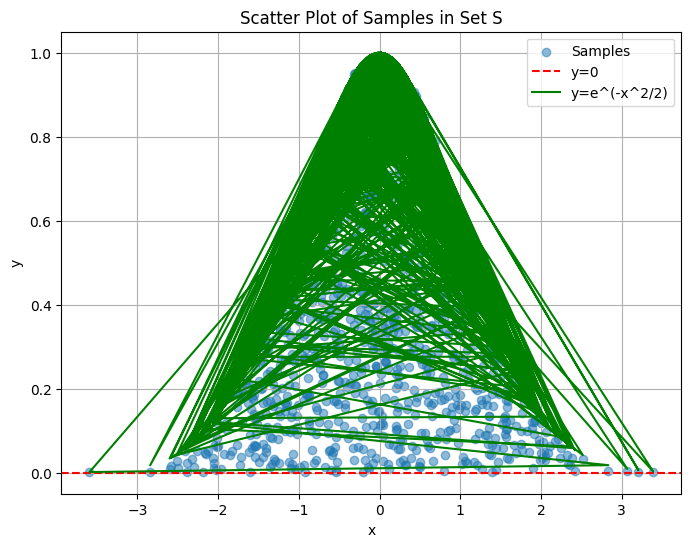

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Initialize arrays to store samples
X = []
Y = []

# Function to sample from the proposal distribution (e.g., a normal distribution)
def sample_from_proposal(num_samples):
    return np.random.normal(0, 1, num_samples)

# Generate samples
while len(X) < num_samples:
    x = sample_from_proposal(1)  # Sample x from the proposal distribution
    y = np.random.uniform(0, np.exp(-x**2/2))  # Sample y uniformly in [0, e^(-x^2/2)]
    X.append(x)
    Y.append(y)

# Create scatter plot of the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, label='Samples')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.plot(X, np.exp(-np.array(X)**2/2), color='green', label='y=e^(-x^2/2)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Samples in Set S')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

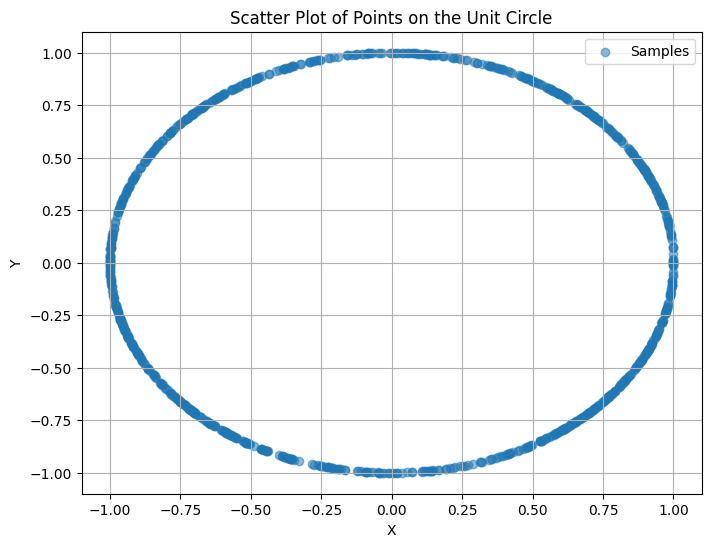

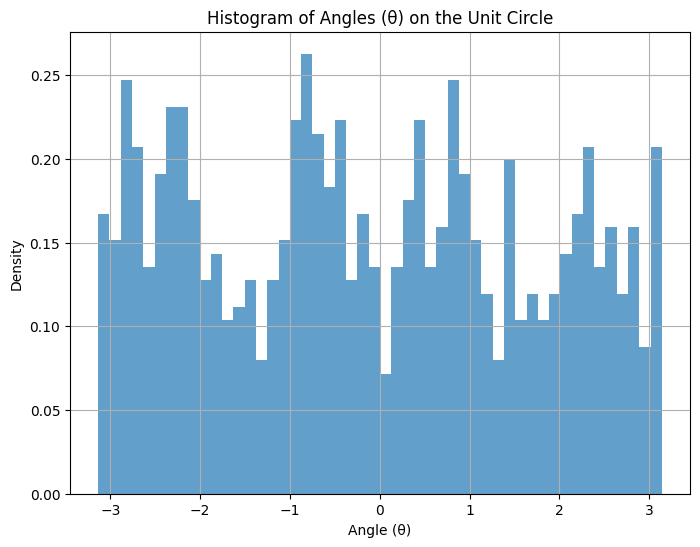

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate points (U_i, V_i) uniformly in [-1, 1]^2
U = np.random.uniform(-1, 1, num_samples)
V = np.random.uniform(-1, 1, num_samples)

# Project points onto the unit circle
X = U / np.sqrt(U**2 + V**2)
Y = V / np.sqrt(U**2 + V**2)

# Compute angles theta_i
theta = np.arctan2(Y, X)

# Create a scatter plot of the generated points on the unit circle
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, label='Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Points on the Unit Circle')
plt.legend()
plt.grid(True)

# Create a histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(theta, bins=50, density=True, alpha=0.7)
plt.xlabel('Angle (θ)')
plt.ylabel('Density')
plt.title('Histogram of Angles (θ) on the Unit Circle')
plt.grid(True)

# Show the plots
plt.show()




---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

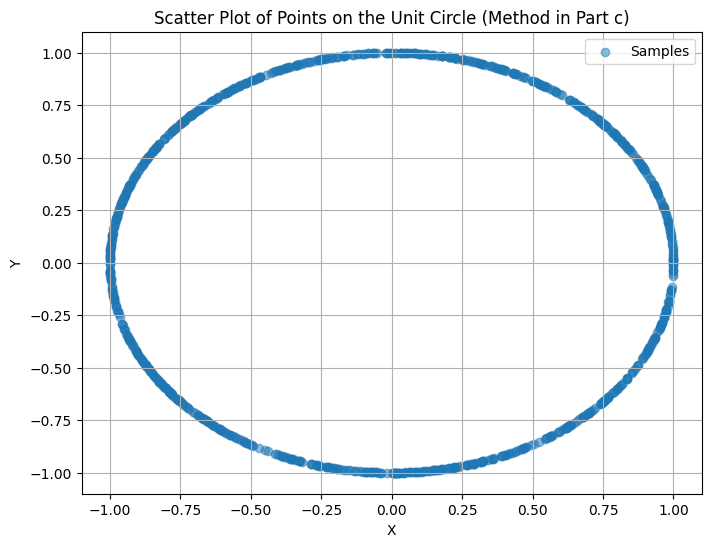

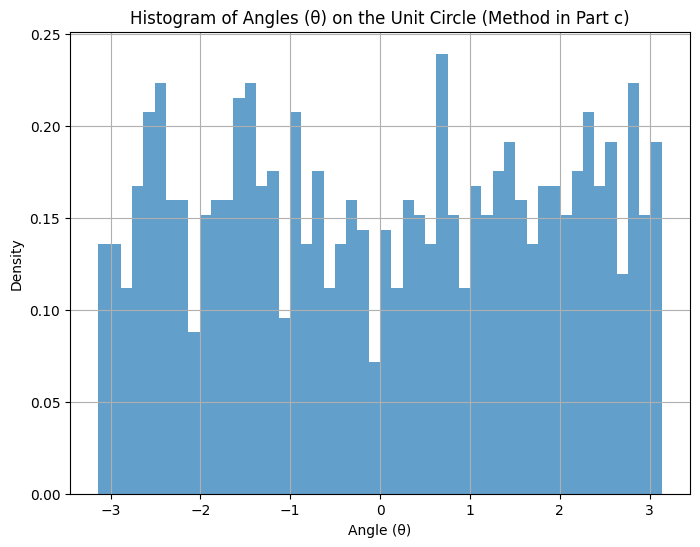

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate points (Z_i, W_i) as independent standard normals
Z = np.random.normal(0, 1, num_samples)
W = np.random.normal(0, 1, num_samples)

# Project points onto the unit circle
X = Z / np.sqrt(Z**2 + W**2)
Y = W / np.sqrt(Z**2 + W**2)

# Compute angles theta_i
theta = np.arctan2(Y, X)

# Create a scatter plot of the generated points on the unit circle
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, label='Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Points on the Unit Circle (Method in Part c)')
plt.legend()
plt.grid(True)

# Create a histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(theta, bins=50, density=True, alpha=0.7)
plt.xlabel('Angle (θ)')
plt.ylabel('Density')
plt.title('Histogram of Angles (θ) on the Unit Circle (Method in Part c)')
plt.grid(True)

# Show the plots
plt.show()


___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [10]:
import numpy as np
import scipy.stats as stats

# Number of passengers
num_passengers = 10000

# Generate random arrival times for passengers
arrival_times = np.random.uniform(0, 1000, num_passengers)

# Sort passengers by arrival time
arrival_times.sort()

# Calculate waiting times for each passenger until the next train
waiting_times = np.zeros(num_passengers)
for i in range(num_passengers - 1):
    waiting_times[i] = arrival_times[i + 1] - arrival_times[i]

# Calculate mean waiting time
mean_waiting_time = np.mean(waiting_times)

# Calculate confidence intervals (assuming a 95% confidence level)
confidence_interval = stats.t.interval(
    confidence=0.95,              # Confidence level
    df=num_passengers - 1,  # Degrees of freedom
    loc=mean_waiting_time,   # Sample mean
    scale=stats.sem(waiting_times)  # Standard error of the mean
)

print(f"Estimated Mean Waiting Time: {mean_waiting_time:.2f} minutes")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) minutes")


Estimated Mean Waiting Time: 0.10 minutes
95% Confidence Interval: (0.10, 0.10) minutes


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [11]:
import numpy as np

# Number of passengers
num_passengers = 10000

# Generate random arrival times for passengers
arrival_times = np.random.uniform(0, 1000, num_passengers)

# Sort passengers by arrival time
arrival_times.sort()

# Generate inter-arrival times for trains (exponential distribution with mean 10 minutes)
mean_interarrival_time = 10
interarrival_times = np.random.exponential(scale=mean_interarrival_time, size=num_passengers)

# Calculate waiting times for each passenger until the next train
waiting_times = np.zeros(num_passengers)
for i in range(num_passengers - 1):
    waiting_times[i] = interarrival_times[i]

# Calculate mean waiting time
mean_waiting_time = np.mean(waiting_times)

print(f"Estimated Mean Waiting Time: {mean_waiting_time:.2f} minutes")


Estimated Mean Waiting Time: 10.11 minutes


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [16]:
mean_interarrival_train_time = np.mean(interarrival_times)

# Calculate confidence intervals (assuming a 95% confidence level) for the mean inter-arrival time
confidence_interval = stats.t.interval(
    confidence=0.95,              # Confidence level
    df=len(interarrival_times) - 1,  # Degrees of freedom
    loc=mean_interarrival_train_time,   # Sample mean
    scale=stats.sem(interarrival_times)  # Standard error of the mean
)

print(f"Estimated Mean Inter-Arrival Time between Trains: {mean_interarrival_train_time:.2f} minutes")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) minutes")

Estimated Mean Inter-Arrival Time between Trains: 10.05 minutes
95% Confidence Interval: (9.85, 10.24) minutes


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [19]:
import numpy as np
import scipy.stats as stats

# Number of passengers
num_passengers = 10000

# Generate random arrival times for passengers from parts (a) and (b)
arrival_times_part_a = np.random.uniform(0, 1000, num_passengers)
arrival_times_part_b = np.random.uniform(0, 1000, num_passengers)

# Sort passengers by arrival time for both cases
arrival_times_part_a.sort()
arrival_times_part_b.sort()

# Calculate inter-arrival times I_i for each passenger in both cases
interarrival_times_part_a = np.diff(arrival_times_part_a)
interarrival_times_part_b = np.random.exponential(scale=10, size=num_passengers)


# Compute the sample mean and confidence intervals (assuming a 95% confidence level) for I_i in both cases
mean_interarrival_time_part_a = np.mean(interarrival_times_part_a)
confidence_interval_part_a = stats.t.interval(
    confidence=0.95,
    df=len(interarrival_times_part_a) - 1,
    loc=mean_interarrival_time_part_a,
    scale=stats.sem(interarrival_times_part_a)
)

mean_interarrival_time_part_b = np.mean(interarrival_times_part_b)
confidence_interval_part_b = stats.t.interval(
    confidence=0.95,
    df=len(interarrival_times_part_b) - 1,
    loc=mean_interarrival_time_part_b,
    scale=stats.sem(interarrival_times_part_b)
)

print("Part (a):")
print(f"Sample Mean Inter-Arrival Time between Trains (I_i): {mean_interarrival_time_part_a:.2f} minutes")
print(f"95% Confidence Interval: ({confidence_interval_part_a[0]:.2f}, {confidence_interval_part_a[1]:.2f}) minutes")

print("\nPart (b):")
print(f"Sample Mean Inter-Arrival Time between Trains (I_i): {mean_interarrival_time_part_b:.2f} minutes")
print(f"95% Confidence Interval: ({confidence_interval_part_b[0]:.2f}, {confidence_interval_part_b[1]:.2f}) minutes")


Part (a):
Sample Mean Inter-Arrival Time between Trains (I_i): 0.10 minutes
95% Confidence Interval: (0.10, 0.10) minutes

Part (b):
Sample Mean Inter-Arrival Time between Trains (I_i): 10.13 minutes
95% Confidence Interval: (9.93, 10.32) minutes


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  